# Week 1: Introduction

<font size="6"> Laboratory 0 </font> <br>
<font size="3"> Last updated July 17, 2023 </font>

## <span style="color:orange;"> 00. Content </span>

<font size="5"> Mathematics </font>
- N/A
     
<font size="5"> Programming Skills </font>
- Importing libraries
- Latex
    
<font size="5"> Embedded Systems </font>
- N/A

## <span style="color:orange;"> 0. Required Hardware </span>

- Breadboard
- 5 Wires
- LED
- 9V battery
- Voltage Regulator IC (LM 7805)
- 220 ohm resistor

## <span style="color:orange;"> 1. Local Binary Patterns </span>

Identifying textures in images is an important task in many fields, such as medical imaging, remote sensing, and facial detection.
A simple yet powerful method called **local binary patterns** (LBP) is commonly used to classify textures when employed in conjunction with certain machine learning algorithms.

We will be working with the grayscale images in this [folder](https://github.com/TheDataScienceLabs/DSLab_Probability/tree/0efc8e0699ffe1ea6134258f6ec7ebce670236e6/book/labs/2_frequency/lab_02/additional_files/textures). Download the folder of images from GitHub.

For an $m \times n$ grayscale image, there are $m$ rows of pixels and $n$ columns of pixels. Each pixel describes the intensity of the image with an integer ranging from 0 and 255 (0 representing black and 255 representing white).

Please refer to the cell below for instructions on how to read and display grayscale images in Python.


image size is (360, 450)


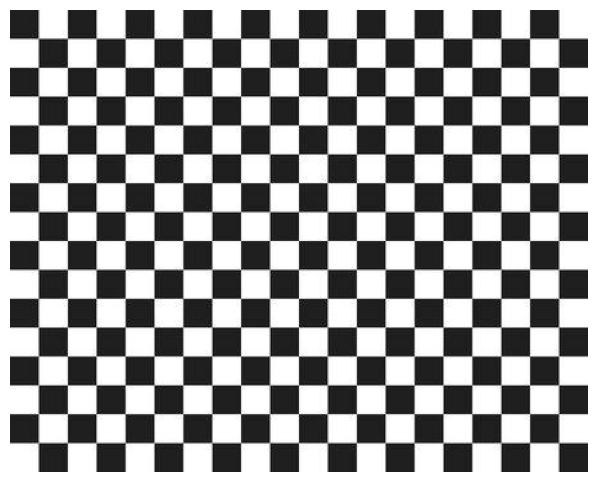

image size is (736, 736)


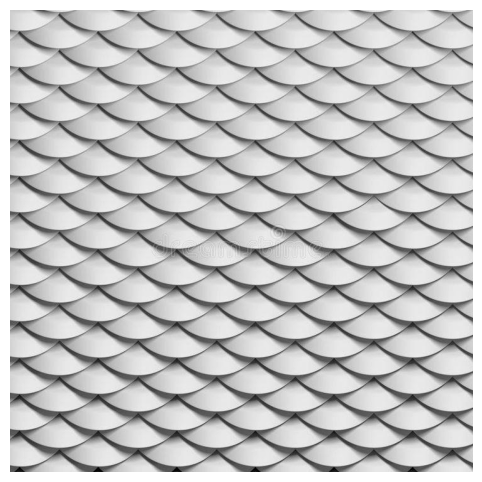

image size is (980, 1268)


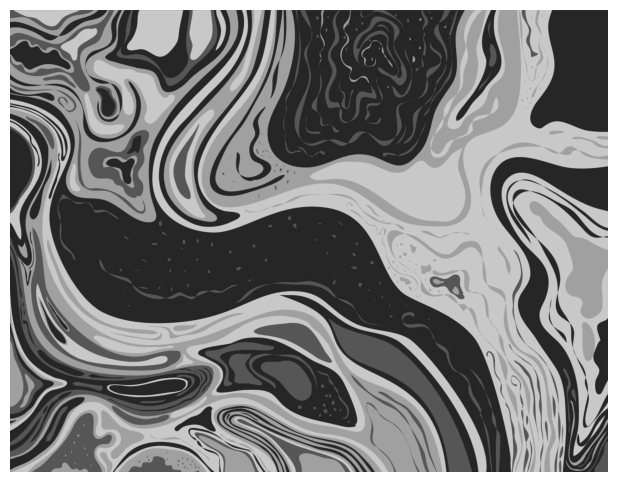

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image  # needed for reading images

for i in range(3):
    img = np.array(
        Image.open(r"files\textures\texture_" + str(i+1) + ".jpg")
    )  # read in the image and store it as a numpy array
    print(f"image size is {img.shape}")
    fig, ax = plt.subplots(figsize=(12, 6))  # create figure and set figure size
    ax.imshow(
        img, cmap="gray", vmin=0, vmax=255
    )  # display the image in grayscale between 0 and 255
    ax.axis('off')                                        # uncomment this line to hide the axes
    plt.show()

### <span style="color:red"> Exercise</span>

Perform the following steps of LBP for each image in the textures [folder](https://github.com/TheDataScienceLabs/DSLab_Probability/tree/0efc8e0699ffe1ea6134258f6ec7ebce670236e6/book/labs/2_frequency/lab_02/additional_files/textures):

**1.** For each pixel, examine the values of its 8 neighboring pixels.

> Ex:
> | | | |
> | --- | --- | ---|
> | 10 | 15 | 12 |
> | 19 | 12 | 11 |
> | 20 | 16 | 12 |

**2.** Starting from the pixel directly above the center pixel, proceed clockwise around the center to generate an 8-bit binary sequence. Assign `'0'` if the neighbor's value is greater than the center pixel's value, and `'1'` otherwise.

> Using the given example, we begin at the center value of 12 and then move to the top neighbor, which is 15. Therefore, the binary sequence starts with `'0'`. 
> Continuing clockwise, we arrive at the top-right neighbor of 12. Hence, the binary sequence becomes `'01'`. If we continue this process, the final binary number will be `'01110001'`.

**3.** Convert the 8-bit binary sequence to a base-10 integer.

> In our example, the resulting LBP value is 113.

**4.** Create a plot illustrating the frequency of each LBP value, ranging from 0 to 255. 

<div style="border: 2px solid red; padding: 10px;">
  <h3> Answer assignment below </h3>
</div>



### <span style="color:#ff7f0e"> Answer </span>

First, we define the LBP function. 

In [5]:
def calculate_lbp(image):
    rows, cols = image.shape
    lbp_image = np.zeros_like(image, dtype=np.uint8)
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            center = image[i, j]
            binary_arr = [image[i-di, j+dj] for dj, di in [(0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (-1, 1)]]
            binary_str = ''.join(
                ['0' if pixel > center else '1' for pixel in binary_arr]
            )
            lbp_image[i, j] = int(binary_str, 2)
    return lbp_image

Now we can test it to make sure it gives the right answer. 

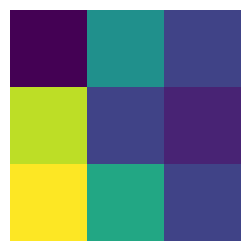

[[  0   0   0]
 [  0 113   0]
 [  0   0   0]]


In [6]:
arr = np.array([[10, 15, 12], [19, 12, 11], [20, 16, 12]])
plt.figure(figsize=(3,3))
plt.imshow(arr)
plt.axis('off')
plt.show()
print(calculate_lbp(arr))

Now we can plot the LPB for all the textures. 

In [7]:
import os
import matplotlib.image as mpimg

lbp_image_list = []
image_list = []

def plot_lbp_histograms(folder_path):
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(folder_path, filename)
            image = mpimg.imread(image_path)
            image_list.append(image)
            if image.ndim == 3:  # Convert RGB to grayscale
                image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])
            elif image.ndim == 2:  # Already grayscale
                pass
            else:
                raise ValueError("Unsupported image format.")
            
            # Normalize the image to 0-255 and calculate LBP
            image = (image / image.max() * 255).astype(np.uint8)
            lbp_image = calculate_lbp(image)

            plt.figure(figsize=(3,3))
            plt.imshow(lbp_image, cmap='gray')
            plt.axis('off')
            plt.show()

            lbp_image_list.append(lbp_image)
            
            # Plot histogram
            plt.figure(figsize=(8, 3))
            plt.hist(lbp_image.ravel(), bins=256, range=(0, 256), density=False)
            plt.title(f'LBP Histogram for {filename}')
            plt.xlabel('LBP Value')
            plt.ylabel('Frequency')
            plt.gca().ticklabel_format(style='sci', axis='y', scilimits=(0,0))
            plt.show()


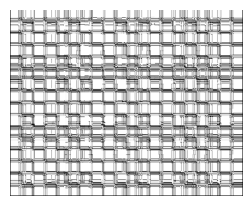

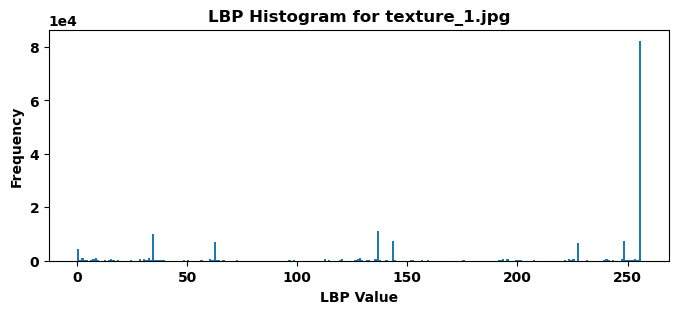

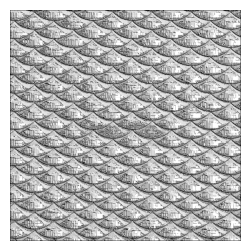

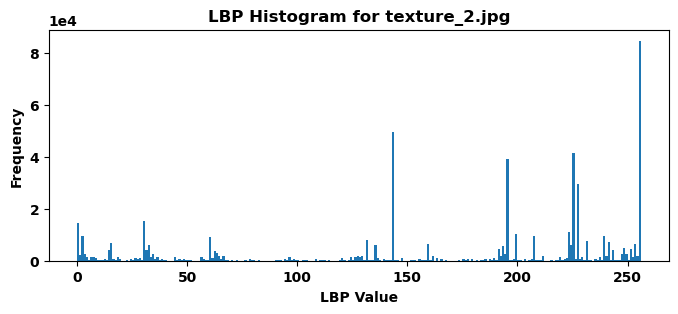

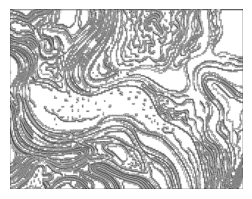

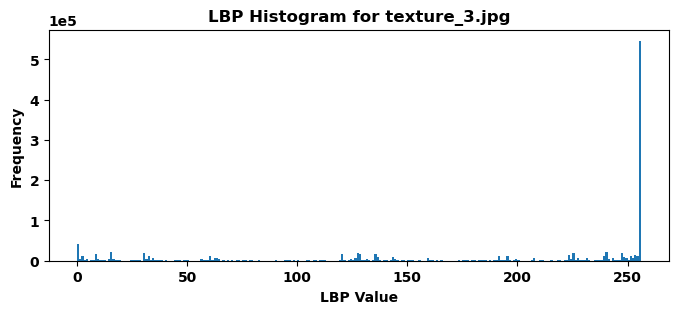

In [9]:
folder_path = 'files/textures'
plot_lbp_histograms(folder_path)